<a href="https://colab.research.google.com/github/hyper-mage/CS6375/blob/master/Sci-kitLearnLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(digits.DESCR)

(1797, 64)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted 

<Figure size 432x288 with 0 Axes>

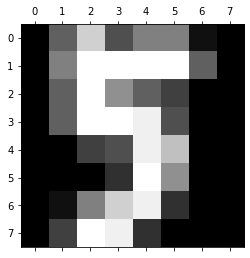

In [0]:
# just the first
%matplotlib inline  
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[33]) 
plt.show() 

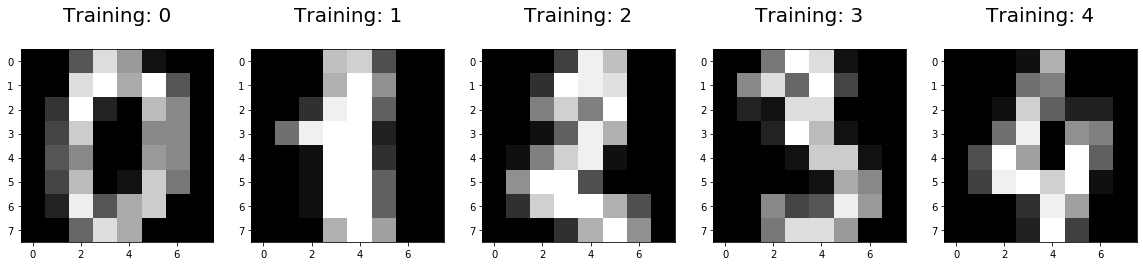

In [0]:
# top 5
import numpy as np 
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression
# using all defaults - you should change parameters
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


In [0]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


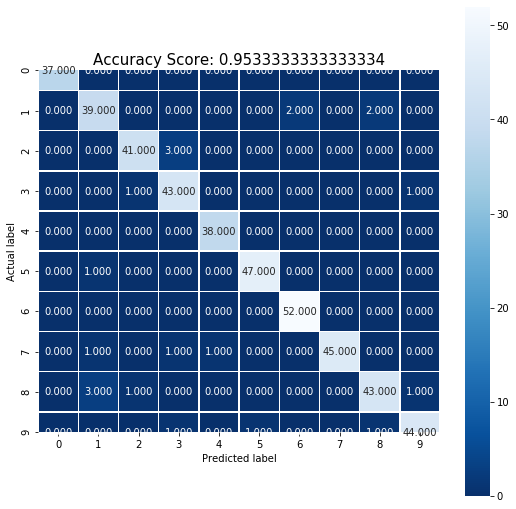

In [0]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [0]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
%matplotlib inline  

##################################################################################################
#	Create a fictional dataset, using the make_classification function and then add some noise
##################################################################################################

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

In [0]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed o

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None,
                     names=['Wine','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
                            'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                            'Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])

In [0]:
print(df.shape)
print(df)

(178, 14)
     Wine  Alcohol  Malic acid  ...   Hue  OD280/OD315 of diluted wines  Proline
0       1    14.23        1.71  ...  1.04                          3.92     1065
1       1    13.20        1.78  ...  1.05                          3.40     1050
2       1    13.16        2.36  ...  1.03                          3.17     1185
3       1    14.37        1.95  ...  0.86                          3.45     1480
4       1    13.24        2.59  ...  1.04                          2.93      735
..    ...      ...         ...  ...   ...                           ...      ...
173     3    13.71        5.65  ...  0.64                          1.74      740
174     3    13.40        3.91  ...  0.70                          1.56      750
175     3    13.27        4.28  ...  0.59                          1.56      835
176     3    13.17        2.59  ...  0.60                          1.62      840
177     3    14.13        4.10  ...  0.61                          1.60      560

[178 rows x 14 co

In [0]:
print(df.columns)

Index(['Wine', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


NameError: ignored

In [0]:
########################################################################
#	Decision Tree
########################################################################

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(df)
X = df.loc[:, df.columns != 'Wine']
y = df.loc[:, df.columns == 'Wine']
print(X)
print(y)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'min_impurity_decrease': [0.0,.05,.1],
                     'max_leaf_nodes': [5,10,None],
                     'max_features': ['log2','sqrt',None],
                     'max_depth': [4,8,12,None]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(DecisionTreeClassifier(random_state=0), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

     Alcohol  Malic acid   Ash  ...   Hue  OD280/OD315 of diluted wines  Proline
0      14.23        1.71  2.43  ...  1.04                          3.92     1065
1      13.20        1.78  2.14  ...  1.05                          3.40     1050
2      13.16        2.36  2.67  ...  1.03                          3.17     1185
3      14.37        1.95  2.50  ...  0.86                          3.45     1480
4      13.24        2.59  2.87  ...  1.04                          2.93      735
..       ...         ...   ...  ...   ...                           ...      ...
173    13.71        5.65  2.45  ...  0.64                          1.74      740
174    13.40        3.91  2.48  ...  0.70                          1.56      750
175    13.27        4.28  2.26  ...  0.59                          1.56      835
176    13.17        2.59  2.37  ...  0.60                          1.62      840
177    14.13        4.10  2.74  ...  0.61                          1.60      560

[178 rows x 13 columns]
   

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'max_depth': 4, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0}

Grid scores on development set:

0.895 (+/-0.191) for {'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0}
0.889 (+/-0.190) for {'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.05}
0.845 (+/-0.241) for {'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.1}
0.888 (+/-0.185) for {'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0}
0.889 (+/-0.190) for {'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.05}
0.845 (+/-0.241) for {'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.1}
0.840 (+/-0.169) for {'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0}
0.878 (+/-0.222) for {'max_de

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
########################################################################
#	Neural Net
########################################################################

from sklearn.neural_network import MLPClassifier

# Set the parameters by cross-validation
tuned_parameters = [{'hidden_layer_sizes': [2,3,5],
                     'activation': ['relu','tanh'],
                     'alpha': [0.01,0.0001],
                     'learning_rate_init': [0.1,0.001],
                     'max_iter': [10,100,200]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Best parameters set found on development set:

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 5, 'learning_rate_init': 0.001, 'max_iter': 200}

Grid scores on development set:

0.120 (+/-0.028) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 2, 'learning_rate_init': 0.1, 'max_iter': 10}
0.124 (+/-0.014) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 2, 'learning_rate_init': 0.1, 'max_iter': 100}
0.195 (+/-0.308) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 2, 'learning_rate_init': 0.1, 'max_iter': 200}
0.109 (+/-0.028) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 2, 'learning_rate_init': 0.001, 'max_iter': 10}
0.153 (+/-0.151) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 2, 'learning_rate_init': 0.001, 'max_iter': 100}
0.175 (+/-0.210) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 2, 'learning_rate_init': 0.001, 'max_iter': 200}
0.112 (+/-0.023) for {'activation': 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

Best parameters set found on development set:

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 5, 'learning_rate_init': 0.1, 'max_iter': 200}

Grid scores on development set:

0.333 (+/-0.000) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 2, 'learning_rate_init': 0.1, 'max_iter': 10}
0.333 (+/-0.000) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 2, 'learning_rate_init': 0.1, 'max_iter': 100}
0.333 (+/-0.000) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 2, 'learning_rate_init': 0.1, 'max_iter': 200}
0.333 (+/-0.000) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 2, 'learning_rate_init': 0.001, 'max_iter': 10}
0.415 (+/-0.259) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 2, 'learning_rate_init': 0.001, 'max_iter': 100}
0.348 (+/-0.055) for {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 2, 'learning_rate_init': 0.001, 'max_iter': 200}
0.333 (+/-0.000) for {'activation': 'r

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
########################################################################
#	Support Vector Machine
########################################################################

from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf','linear'],
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000],
                     'max_iter': [10,100,200]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 100}

Grid scores on development set:

0.791 (+/-0.168) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 10}
0.754 (+/-0.167) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 100}
0.754 (+/-0.167) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 200}
0.634 (+/-0.275) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 10}
0.548 (+/-0.380) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 100}
0.764 (+/-0.386) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 200}
0.808 (+/-0.254) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 10}
0.751 (+/-0.187) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 100}
0.751 (+/-0.187) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 200}
0.634 (+/-0.275) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear', 'max_iter': 10}
0.548 (+/-0.380) for {'C': 1, 'gamma': 0.000

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local

Best parameters set found on development set:

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 200}

Grid scores on development set:

0.769 (+/-0.153) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 10}
0.707 (+/-0.223) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 100}
0.707 (+/-0.223) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 200}
0.589 (+/-0.222) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 10}
0.602 (+/-0.297) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 100}
0.743 (+/-0.296) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 200}
0.776 (+/-0.179) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 10}
0.738 (+/-0.192) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 100}
0.738 (+/-0.192) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 200}
0.589 (+/-0.222) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear', 'max_iter': 10}
0.602 (+/-0.297) for {'C': 1, 'gamma': 0.0001

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/loc

In [0]:
########################################################################
# Gaussian Naive Bayes
########################################################################

from sklearn.naive_bayes import GaussianNB

# Set the parameters by cross-validation
tuned_parameters = [{'priors': [None]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(GaussianNB(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'priors': None}

Grid scores on development set:

0.978 (+/-0.056) for {'priors': None}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        25
           2       1.00      0.88      0.93        40
           3       0.92      1.00      0.96        24

    accuracy                           0.94        89
   macro avg       0.94      0.96      0.95        89
weighted avg       0.95      0.94      0.94        89


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'priors': None}

Grid scores on development set:

0.980 (+/-0.050) for {'priors': None}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [0]:
########################################################################
# Logistic Regression
########################################################################

from sklearn.linear_model import LogisticRegression

# Set the parameters by cross-validation
tuned_parameters = [{'penalty': ['l1','l2'],
                     'tol': [0.01,0.0001],
                     'C': [1,10,100],
                     'max_iter': [10,50,100]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default 

Best parameters set found on development set:

{'C': 100, 'max_iter': 10, 'penalty': 'l1', 'tol': 0.01}
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        25
           2       1.00      0.88      0.93        40
           3       0.89      1.00      0.94        24

    accuracy                           0.94        89
   macro avg       0.94      0.96      0.95        89
weighted avg       0.95      0.94      0.94        89


# Tuning hyper-parameters for recall



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default 

Best parameters set found on development set:

{'C': 100, 'max_iter': 10, 'penalty': 'l1', 'tol': 0.01}
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        25
           2       1.00      0.88      0.93        40
           3       0.89      1.00      0.94        24

    accuracy                           0.94        89
   macro avg       0.94      0.96      0.95        89
weighted avg       0.95      0.94      0.94        89




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A c

In [0]:
########################################################################
# KNN
########################################################################

from sklearn.neighbors import KNeighborsClassifier

# Set the parameters by cross-validation
tuned_parameters = [{'n_neighbors': [3,5,7],
                     'weights': ['distance','uniform'],
                     'algorithm': ['brute','ball_tree'],
                     'p': [1,2]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when

Best parameters set found on development set:

{'algorithm': 'brute', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
              precision    recall  f1-score   support

           1       0.85      0.88      0.86        25
           2       0.79      0.82      0.80        40
           3       0.76      0.67      0.71        24

    accuracy                           0.80        89
   macro avg       0.80      0.79      0.79        89
weighted avg       0.80      0.80      0.80        89


# Tuning hyper-parameters for recall



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when

Best parameters set found on development set:

{'algorithm': 'brute', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
              precision    recall  f1-score   support

           1       0.85      0.88      0.86        25
           2       0.79      0.82      0.80        40
           3       0.76      0.67      0.71        24

    accuracy                           0.80        89
   macro avg       0.80      0.79      0.79        89
weighted avg       0.80      0.80      0.80        89




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when

In [0]:
########################################################################
# Bagging
########################################################################

from sklearn.ensemble import BaggingClassifier

# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [5,10,15],
                     'max_samples': [1,2],
                     'max_features': [1,2],
                     'random_state': [1,None]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(BaggingClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/l

Best parameters set found on development set:

{'max_features': 1, 'max_samples': 2, 'n_estimators': 15, 'random_state': None}
              precision    recall  f1-score   support

           1       0.42      1.00      0.59        25
           2       0.83      0.50      0.62        40
           3       0.60      0.12      0.21        24

    accuracy                           0.54        89
   macro avg       0.62      0.54      0.47        89
weighted avg       0.65      0.54      0.50        89


# Tuning hyper-parameters for recall



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best parameters set found on development set:

{'max_features': 2, 'max_samples': 2, 'n_estimators': 10, 'random_state': None}
              precision    recall  f1-score   support

           1       0.61      0.88      0.72        25
           2       0.62      0.82      0.71        40
           3       0.00      0.00      0.00        24

    accuracy                           0.62        89
   macro avg       0.41      0.57      0.48        89
weighted avg       0.45      0.62      0.52        89




/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This wi

In [0]:
########################################################################
# Random Forest
########################################################################

from sklearn.ensemble import RandomForestClassifier

# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [5,10,15],
                     'max_depth': [1,5,None],
                     'max_features': ['sqrt',None],
                     'criterion': ['gini','entropy']}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 15}
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        25
           2       1.00      0.90      0.95        40
           3       0.92      1.00      0.96        24

    accuracy                           0.96        89
   macro avg       0.95      0.97      0.96        89
weighted avg       0.96      0.96      0.95        89


# Tuning hyper-parameters for recall



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 10}
              precision    recall  f1-score   support

           1       0.86      1.00      0.93        25
           2       1.00      0.88      0.93        40
           3       0.96      1.00      0.98        24

    accuracy                           0.94        89
   macro avg       0.94      0.96      0.95        89
weighted avg       0.95      0.94      0.94        89




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

In [0]:
########################################################################
# AdaBoost
########################################################################

from sklearn.ensemble import AdaBoostClassifier

# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [25,50,100],
                     'learning_rate': [.5,1,2],
                     'algorithm': ['SAMME','SAMME.R'],
                     'random_state': [1,None]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(AdaBoostClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best parameters set found on development set:

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 100, 'random_state': 1}
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        25
           2       1.00      0.95      0.97        40
           3       0.96      1.00      0.98        24

    accuracy                           0.98        89
   macro avg       0.97      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89


# Tuning hyper-parameters for recall



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best parameters set found on development set:

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 100, 'random_state': 1}
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        25
           2       1.00      0.95      0.97        40
           3       0.96      1.00      0.98        24

    accuracy                           0.98        89
   macro avg       0.97      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
########################################################################
# Gradient Boost
########################################################################

from sklearn.ensemble import GradientBoostingClassifier

# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [25,50,100],
                     'learning_rate': [.1,.01],
                     'loss': ['deviance'],
                     'max_depth': [3,4]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Best parameters set found on development set:

{'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 25}
              precision    recall  f1-score   support

           1       0.86      1.00      0.93        25
           2       0.97      0.85      0.91        40
           3       0.92      0.96      0.94        24

    accuracy                           0.92        89
   macro avg       0.92      0.94      0.92        89
weighted avg       0.93      0.92      0.92        89


# Tuning hyper-parameters for recall



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Best parameters set found on development set:

{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

           1       0.88      0.92      0.90        25
           2       0.94      0.85      0.89        40
           3       0.89      1.00      0.94        24

    accuracy                           0.91        89
   macro avg       0.91      0.92      0.91        89
weighted avg       0.91      0.91      0.91        89




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
########################################################################
# XGBoost 
########################################################################

from xgboost import XGBClassifier

# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [50,100,150],
                     'learning_rate': [.1,.01],
                     'min_child_weight': [1,2],
                     'max_delta_step': [0,1]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(XGBClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

Best parameters set found on development set:

{'learning_rate': 0.1, 'max_delta_step': 1, 'min_child_weight': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        25
           2       1.00      0.93      0.96        40
           3       0.92      1.00      0.96        24

    accuracy                           0.97        89
   macro avg       0.96      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'learning_rate': 0.1, 'max_delta_step': 1, 'min_child_weight': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        25
           2       1.00      0.93      0.96        40
           3       0.92      1.00      0.96        24

    accuracy                           0.97        89
   macro avg       0.96      0.97     

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
